In [1]:
from tensorflow.keras.datasets import mnist

손글씨 데이터 로딩

In [2]:
((X_train, y_train), (X_test, y_test)) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

#########데이터 확인

In [5]:
import matplotlib.pyplot as plt

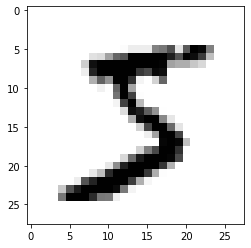

In [6]:

#cmap = plt.cm.binary : 색상> 흑백
plt.imshow(X_train[0], cmap = plt.cm.binary)

In [7]:
#0~255 까지의 숫자로 ㅇㅣ루어져있음
#0이 흰색
#255가 검은색
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
#기계는 0과 1사이의 숫자를 좋아함
#0~255까지의 숫자를 0~1까지로 만들어줌
#전체 데이터를 255로 나눠줌
X_train[0]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [9]:
#28X28의 2차원 데이터를 784의 1차원 데이터로 만들어줄 필요가 있음
#input_dim에 집어넣기 위해서
X_train = X_train.reshape((60000, 28*28))
X_test = X_test.reshape((10000, 784))

In [10]:
X_train[0].shape

(784,)

In [11]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
import pandas as pd
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [13]:
#입력층 개수 : 784
#출력층 개수 : 10




In [14]:
import tensorflow as tf
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
#모델 설계
model = Sequential()
#입력층, 중간층의 활성화 함수 : sigmoid
model.add(Dense(units = 32, input_dim = 784, activation = 'sigmoid'))
model.add(Dense(units = 64, input_dim = 784, activation = 'sigmoid'))
model.add(Dense(units = 128, input_dim = 784, activation = 'sigmoid'))
model.add(Dense(units = 64, input_dim = 784, activation = 'sigmoid'))
model.add(Dense(units = 32, input_dim = 784, activation = 'sigmoid'))

#출력층의 활성화 함수 : sigmoid
model.add(Dense(units = 10, activation = 'sigmoid'))

model

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 46,218
Trainable params: 46,218
Non-trainable params: 0
____________________________________________________

In [17]:
#모델 학습 방법 설정
# loss = categorical_crossentropy
#optimizer = adam
#metrics = accuracy
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])



In [18]:
#모델 학습
#20
history1 = model.fit(X_train,y_train,epochs = 20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 53us/sample - loss: 1.3946 - accuracy: 0.4700
Epoch 2/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.6510 - accuracy: 0.7942
Epoch 3/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3758 - accuracy: 0.9044
Epoch 4/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2915 - accuracy: 0.9235
Epoch 5/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2505 - accuracy: 0.9327
Epoch 6/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2247 - accuracy: 0.9399
Epoch 7/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2029 - accuracy: 0.9453
Epoch 8/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.1837 - accuracy: 0.9505
Epoch 9/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.1680 - accuracy: 0.9543
Epoch 10/20
60

In [19]:
#모델 평가
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.1888 - accuracy: 0.9534


[0.18875090100094677, 0.9534]

In [20]:
#모든 조건은 동일
#model2라는 딥러닝 모델 설계
#입력층과 중간층의 활성화함수 sigmoid > relu
#history2 = model2.fit()

In [81]:
model2 = Sequential()
#입력층, 중간층의 활성화 함수 : relu
model2.add(Dense(units = 32, input_dim = 784, activation = 'relu'))
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dense(units = 128,  activation = 'relu'))
model2.add(Dense(units = 64,  activation = 'relu'))
model2.add(Dense(units = 32,  activation = 'relu'))

#출력층의 활성화 함수 : softmax
model2.add(Dense(units = 10, activation = 'softmax'))


In [83]:

model2.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])


In [23]:
y_train

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


In [24]:
history2 = model2.fit(X_train,y_train, epochs = 20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4116 - accuracy: 0.8763
Epoch 2/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1938 - accuracy: 0.9457
Epoch 3/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1590 - accuracy: 0.9541
Epoch 4/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.1394 - accuracy: 0.9603
Epoch 5/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.1256 - accuracy: 0.9640
Epoch 6/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1139 - accuracy: 0.9670
Epoch 7/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1011 - accuracy: 0.9708
Epoch 8/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0935 - accuracy: 0.9717
Epoch 9/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0867 - accuracy: 0.9745
Epoch 10/20
60

In [25]:
model2.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.1592 - accuracy: 0.9646


[0.15923973087593912, 0.9646]

In [26]:
#model1 > 입력층, 중간층 활성화함수 : sigmoid
#model 2 > 입력층, 중간층 활성화 함수 : relu


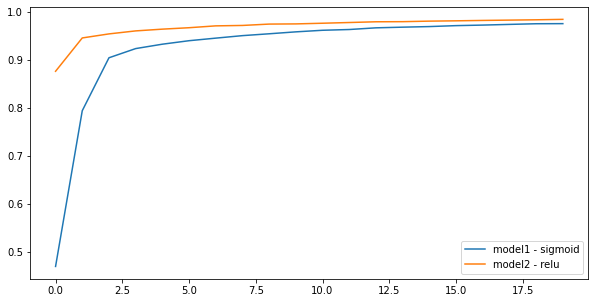

In [27]:
plt.figure(figsize=(10,5))
#range 범위 : epochs 갯수
plt.plot(range(20), history1.history['accuracy'], label = 'model1 - sigmoid')
plt.plot(range(20), history2.history['accuracy'], label = 'model2 - relu')

plt.legend()#범례표시
plt.show()

In [28]:
#model1에서 epochs을 돌린결과가 들어있음
#history라는 함수를 통해서 accuracy

history1.history['accuracy']


[0.47001666,
 0.7942167,
 0.9044,
 0.9235333,
 0.93268335,
 0.93993336,
 0.94528335,
 0.9504833,
 0.95435,
 0.9583667,
 0.96165,
 0.96323335,
 0.96673334,
 0.96811664,
 0.96935,
 0.9713167,
 0.97245,
 0.97388333,
 0.97525,
 0.97546667]

In [29]:
#jpg>컬러사진
#gif>흑백사진


###직접 그린 그림 불러오기

In [30]:
import PIL.Image as pimg

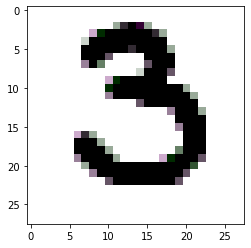

In [31]:
img_num33 = pimg.open('num33.gif')

plt.imshow(img_num33)

In [32]:
#28*28 2차원 데이터> 784의 1차원 데이터로 변환
#0~255사이의 픽셀값 > 0~1 사이의 픽셀 값
img_num33

In [33]:
#이미지 타입을 넘파이 배열로 변환
num33 = np.array(img_num33)


In [34]:
#기존에는 흰색>0 검은색 > 255
#지금은 흰색이 >255 검은색 >0

num33 = 255 - num33

In [35]:
num33 = num33.reshape(1,784)
num33 = num33.astype('float32')/255

In [36]:
#예측하기
#10개의 값이 출력
# 0:0%
#1 :0%
#2:0%
#3:0%
#4:99%
(model2.predict(num33)*100).astype('int')

array([[ 0,  0,  0, 97,  0,  0,  0,  0,  0,  1]])

In [37]:
model2.predict_classes(num33)

array([3], dtype=int64)

In [38]:
##딥러닝 모델 저장 -파일형식으로 저장

In [39]:
model2.save('./model/model_handnum1.h5')

In [43]:
from tensorflow.keras.models import load_model

In [44]:
model3 = load_model('./model/model_handnum1.h5')

In [45]:
model3.evaluate(X_train,y_train)

60000/60000 [==============================] - 2s 29us/sample - loss: 0.0391 - accuracy: 0.9881


[0.03905361194554716, 0.98808336]

In [46]:
# 영선씨의 모델 가져오기
model_youngsun = load_model('./model/model_youngsun.h5')

In [47]:
model_youngsun.evaluate(X_train,y_train)

60000/60000 [==============================] - 2s 33us/sample - loss: 0.0010 - accuracy: 0.9997


[0.001041066051255196, 0.99965]

In [40]:
##딥러닝 교차검증

In [48]:
from sklearn.model_selection import KFold, cross_val_score

In [54]:
def deep_model():
    model2 = Sequential()

    model2.add(Dense(units = 32, input_dim = 784, activation = 'relu'))
    model2.add(Dense(units = 64, activation = 'relu'))
    model2.add(Dense(units = 128,  activation = 'relu'))
    model2.add(Dense(units = 64,  activation = 'relu'))
    model2.add(Dense(units = 32,  activation = 'relu'))

    #출력층의 활성화 함수 : relu
    model2.add(Dense(units = 10, activation = 'softmax'))


    model2.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

    return model2

    

In [60]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

#KerasClassifier(딥러닝 모델 함수, epochs, batch_size)
model3 = KerasClassifier(build_fn = deep_model, epochs = 20, batch_size = 10)

#cross_val_score(모델, 학습데이터, 정답데이터, cv = KFold를 사용한 변수)

#몇 개로 어떻게 구분할 것인지
# KFold(n_split = 몇 개로 나눌것인지, shuffle, 데이터를 섞을 건지, random_state)
fold = KFold(n_splits = 5, shuffle = True, random_state = 0)
# cross_val_score(모델, 학습데이터, 정답데이터, cv = KFold를 사용한 변수)
score = cross_val_score(model3, X_train, y_train, cv = fold)

Train on 48000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 129us/sample - loss: 0.3297 - accuracy: 0.8985
Epoch 2/20
48000/48000 [==============================] - 6s 122us/sample - loss: 0.1722 - accuracy: 0.9491
Epoch 3/20
48000/48000 [==============================] - 6s 122us/sample - loss: 0.1390 - accuracy: 0.9596
Epoch 4/20
48000/48000 [==============================] - 6s 121us/sample - loss: 0.1185 - accuracy: 0.9647
Epoch 5/20
48000/48000 [==============================] - 6s 121us/sample - loss: 0.1059 - accuracy: 0.9683
Epoch 6/20
48000/48000 [==============================] - 6s 121us/sample - loss: 0.0933 - accuracy: 0.9721
Epoch 7/20
48000/48000 [==============================] - 6s 121us/sample - loss: 0.0848 - accuracy: 0.9747
Epoch 8/20
48000/48000 [==============================] - 6s 124us/sample - loss: 0.0771 - accuracy: 0.9766
Epoch 9/20
48000/48000 [==============================] - 6s 127us/sample - loss: 0.0718 - accuracy: 0.9783
Epoch

48000/48000 [==============================] - 6s 118us/sample - loss: 0.0549 - accuracy: 0.9837
Epoch 14/20
48000/48000 [==============================] - 6s 119us/sample - loss: 0.0500 - accuracy: 0.9852
Epoch 15/20
48000/48000 [==============================] - 6s 124us/sample - loss: 0.0464 - accuracy: 0.9858
Epoch 16/20
48000/48000 [==============================] - 6s 127us/sample - loss: 0.0471 - accuracy: 0.9859
Epoch 17/20
48000/48000 [==============================] - 6s 125us/sample - loss: 0.0460 - accuracy: 0.9866
Epoch 18/20
48000/48000 [==============================] - 6s 125us/sample - loss: 0.0435 - accuracy: 0.9868
Epoch 19/20
48000/48000 [==============================] - 6s 129us/sample - loss: 0.0424 - accuracy: 0.9875
Epoch 20/20
12000/12000 [==============================] - 1s 92us/sample - loss: 0.1908 - accuracy: 0.9689
Train on 48000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 125us/sample - loss: 0.3112 - accuracy: 0.9046
Epoch 2/20

In [63]:
score

array([0.96666664, 0.96625   , 0.96741664, 0.96891665, 0.96883333])

In [41]:
##베스트 모델 찾아서 저장하기

In [66]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#모델을 저장할 폴더명

MODEL_FOLDER = './model'
# 해당 폴더가 없다면 해당폴더를 생성
if not os.path.exists(MODEL_FOLDER) :
    os.mkdir(MODEL_FOLDER)

In [73]:
#저장할 파일 명 설정
#{epoch:04d} : 반복수를 4자리로 표시
#{val_accuracy:.4f} : 검증 정확도를 소수점 4째자리까지 표시

modelpath = MODEL_FOLDER + '/handnum-{epoch:04d}-{val_accuracy:.4f}.hdf5'

In [74]:
# 베스트 모델을 찾아서 만들어둔 파일 명으로 저장
#ModelCheckpoint(filepath = 파일경로, monitor = 기준값, save_best_only = True)
#save_best_only = True : 더 나은 결과값만 저장
mc = ModelCheckpoint(filepath = modelpath,
                    monitor = 'val_accuracy',
                    save_best_only = True,
                    verbose = 1)

In [75]:
#EarlyStopping(monitor, patience = 기다리는 횟수)
#patience = 20 : monitor 에 적은 기준에 따라 학습 결과가 더 나아지지 않더라도
#20은 돌려보겠다
es = EarlyStopping(monitor = 'val_accuracy',
                  patience = 20)

In [84]:
#학습
#validation_split = 0.33:전체 데이터 중에서 33%를 검증데이터로 활용 평가
history = model2.fit(X_train, y_train, epochs = 1000, batch_size = 50,
                    validation_split = 0.33,
                    callbacks = [mc,es]
                    )

Train on 40199 samples, validate on 19801 samples
Epoch 1/1000
39150/40199 [============================>.] - ETA: 0s - loss: 0.4301 - accuracy: 0.8656
Epoch 00001: val_accuracy improved from 0.10878 to 0.92990, saving model to ./model/handnum-0001-0.9299.hdf5
40199/40199 [==============================] - 2s 56us/sample - loss: 0.4246 - accuracy: 0.8675 - val_loss: 0.2312 - val_accuracy: 0.9299
Epoch 2/1000
39750/40199 [============================>.] - ETA: 0s - loss: 0.1838 - accuracy: 0.9446
Epoch 00002: val_accuracy improved from 0.92990 to 0.95152, saving model to ./model/handnum-0002-0.9515.hdf5
40199/40199 [==============================] - 2s 43us/sample - loss: 0.1831 - accuracy: 0.9449 - val_loss: 0.1616 - val_accuracy: 0.9515
Epoch 3/1000
39400/40199 [============================>.] - ETA: 0s - loss: 0.1404 - accuracy: 0.9570
Epoch 00003: val_accuracy improved from 0.95152 to 0.95329, saving model to ./model/handnum-0003-0.9533.hdf5
40199/40199 [============================

38250/40199 [===========================>..] - ETA: 0s - loss: 0.0105 - accuracy: 0.9969
Epoch 00053: val_accuracy did not improve from 0.97020
40199/40199 [==============================] - 2s 42us/sample - loss: 0.0111 - accuracy: 0.9967 - val_loss: 0.2042 - val_accuracy: 0.9675
Epoch 54/1000
39200/40199 [============================>.] - ETA: 0s - loss: 0.0128 - accuracy: 0.9963
Epoch 00054: val_accuracy did not improve from 0.97020
40199/40199 [==============================] - 2s 43us/sample - loss: 0.0133 - accuracy: 0.9963 - val_loss: 0.2187 - val_accuracy: 0.9668
Epoch 55/1000
39700/40199 [============================>.] - ETA: 0s - loss: 0.0130 - accuracy: 0.9962
Epoch 00055: val_accuracy did not improve from 0.97020
40199/40199 [==============================] - 2s 43us/sample - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.2000 - val_accuracy: 0.9693
Epoch 56/1000
39500/40199 [============================>.] - ETA: 0s - loss: 0.0056 - accuracy: 0.9983
Epoch 00056: val_accura

In [79]:
X_train.shape

(60000, 784)

In [80]:
y_train.shape

(60000, 10)